# **About This Kernel**
* What is the purpose of the study?

I am working on Deep Learning and Computer Vision in Flying Automobile Project. The project I am working on are Semantic segmentation (Aerial images) during the flight of the vehicle to find suitable areas where the vehicle can land. To make volumetric control of the vehicle to these areas. 

With this kernel, I have completed working on the **Semantic segmentation**
    
 <a class="anchor" id="0."></a>
# **Content**

1. [What is semantic segmentation](#1.)
1. [Implementation of Segnet, FCN, UNet , PSPNet and other models in Keras](#2.)
1. [I extracted Github codes](#3.)

<a class="anchor" id="1."></a> 
# 1.What is semantic segmentation

Source: https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html

Semantic image segmentation is the task of classifying each pixel in an image from a predefined set of classes. In the following example, different entities are classified.

![Semantic segmentation of a bedroom image](https://divamgupta.com/assets/images/posts/imgseg/image15.png?style=centerme)

In the above example, the pixels belonging to the bed are classified in the class “bed”, the pixels corresponding to the walls are labeled as “wall”, etc.

In particular, our goal is to take an image of size W x H x 3 and generate a W x H matrix containing the predicted class ID’s corresponding to all the pixels.

![Image source: jeremyjordan.me](https://divamgupta.com/assets/images/posts/imgseg/image14.png?style=centerme)

Usually, in an image with various entities, we want to know which pixel belongs to which entity, For example in an outdoor image, we can segment the sky, ground, trees, people, etc.

Semantic segmentation is different from object detection as it does not predict any bounding boxes around the objects. We do not distinguish between different instances of the same object. For example, there could be multiple cars in the scene and all of them would have the same label.

![An example where there are multiple instances of the same object class](https://divamgupta.com/assets/images/posts/imgseg/image7.png?style=centerme)

In order to perform semantic segmentation, a higher level understanding of the image is required. The algorithm should figure out the objects present and also the pixels which correspond to the object. Semantic segmentation is one of the essential tasks for complete scene understanding.


## Dataset

The first step in training our segmentation model is to prepare the dataset. We would need the input RGB images and the corresponding segmentation images. If you want to make your own dataset, a tool like labelme or GIMP can be used to manually generate the ground truth segmentation masks.

Assign each class a unique ID. In the segmentation images, the pixel value should denote the class ID of the corresponding pixel. This is a common format used by most of the datasets and keras_segmentation. For the segmentation maps, do not use the jpg format as jpg is lossy and the pixel values might change. Use bmp or png format instead. And of course, the size of the input image and the segmentation image should be the same.

In the following example, pixel (0,0) is labeled as class 2, pixel (3,4) is labeled as class 1 and rest of the pixels are labeled as class 0.


In [1]:
import cv2
import numpy as np

ann_img = np.zeros((30,30,3)).astype('uint8')
ann_img[ 3 , 4 ] = 1 # this would set the label of pixel 3,4 as 1
ann_img[ 0 , 0 ] = 2 # this would set the label of pixel 0,0 as 2


After generating the segmentation images, place them in the training/testing folder. Make separate folders for input images and the segmentation images. The file name of the input image and the corresponding segmentation image should be the same. For this tutorial we would be using a data-set which is already prepared. You can download it from here ([Aerial Semantic Segmentation Drone Dataset](https://www.kaggle.com/bulentsiyah/semantic-drone-dataset)).

## [Aerial Semantic Segmentation Drone Dataset](https://www.kaggle.com/bulentsiyah/semantic-drone-dataset)

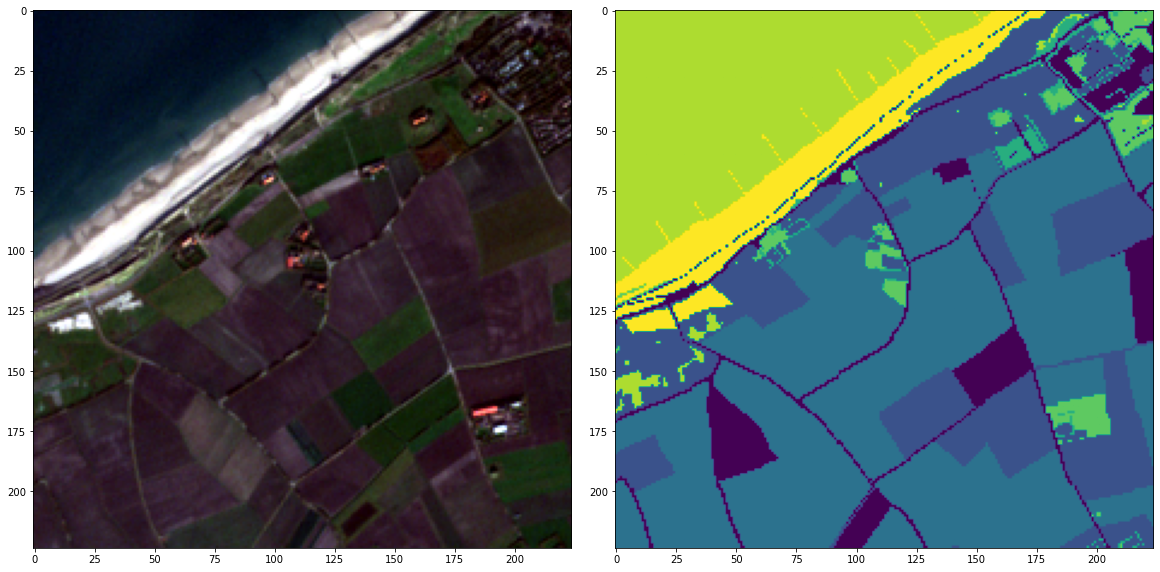

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

original_image = "../dataset/images_prepared_train/1.png"
label_image_semantic = "../dataset/annotation_prepared_train/1.png"

fig, axs = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)
axs[1].imshow(label_image_semantic)
axs[1].grid(False)

<a class="anchor" id="2."></a> 
# 2.Implementation of Segnet, FCN, UNet , PSPNet and other models in Keras

Source Github Link: https://github.com/divamgupta/image-segmentation-keras

Models
Following models are supported:

| model_name       | Base Model     | Segmentation Model     |
| :------------- | :----------: | -----------: |
|  fcn_8 | Vanilla CNN  | FCN8   |
|  fcn_32  | Vanilla CNN | FCN8 |
|  fcn_8_vgg | VGG 16  | FCN8   |
|  fcn_32_vgg  | VGG 16 | FCN32 |
|  fcn_8_resnet50 | Resnet-50  | FCN32  |
|  fcn_32_resnet50  | Resnet-50 | FCN32 |
| fcn_8_mobilenet  | MobileNet  | FCN32   |
| fcn_32_mobilenet   | MobileNet | FCN32 |
| pspnet  | Vanilla CNN  | PSPNet   |
| vgg_pspnet   | VGG 16 | PSPNet |
|  resnet50_pspnet  | Resnet-50  |  PSPNet  |
| unet_mini   | Vanilla Mini CNN  | U-Net   |
| unet   | Vanilla CNN  | U-Net   |
| vgg_unet   | VGG 16  | U-Net   |
| resnet50_unet   | Resnet-50  |  U-Net  |
|  mobilenet_unet  | MobileNet  | U-Net   |
| segnet   | Vanilla CNN  | Segnet   |
| vgg_segnet   | VGG 16  |  Segnet  |
|  resnet50_segnet  | Resnet-50  | Segnet   |
|  mobilenet_segnet  | MobileNet  | Segnet   |
		
        



In [3]:
!pip install keras-segmentation

  Using cached imgaug-0.2.9-py2.py3-none-any.whl (753 kB)
ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: '/home/bd/anaconda3/envs/tf-gpu4/lib/python3.7/site-packages/numpy-1.19.1.dist-info/METADATA'



### Train

In [9]:


epochs = 100


In [10]:
from keras_segmentation.models.unet import vgg_unet

n_classes = 9 # Aerial Semantic Segmentation Drone Dataset tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle
model = vgg_unet(n_classes=n_classes ,  input_height=224, input_width=224 )

model.train( 
    train_images =  "../dataset/images_prepared_train/",
    train_annotations = "../dataset/annotation_prepared_train/",
    checkpoints_path = "../vgg_unet" , epochs=epochs
)


  1%|          | 46/5159 [00:00<00:11, 457.74it/s]

Verifying training dataset


100%|██████████| 5159/5159 [00:11<00:00, 457.68it/s]


Dataset verified! 
Epoch 1/100
512/512 [==============================] - 19s 38ms/step - loss: 2.6083 - accuracy: 0.1744
Epoch 2/100
512/512 [==============================] - 19s 38ms/step - loss: 2.3681 - accuracy: 0.2484
Epoch 3/100
512/512 [==============================] - 18s 36ms/step - loss: 2.2119 - accuracy: 0.3032
Epoch 4/100
512/512 [==============================] - 18s 36ms/step - loss: 2.1227 - accuracy: 0.3348
Epoch 5/100
512/512 [==============================] - 18s 36ms/step - loss: 2.0707 - accuracy: 0.3530
Epoch 6/100
512/512 [==============================] - 18s 36ms/step - loss: 2.0297 - accuracy: 0.3667
Epoch 7/100
512/512 [==============================] - 18s 36ms/step - loss: 1.9953 - accuracy: 0.3727
Epoch 8/100
512/512 [==============================] - 18s 36ms/step - loss: 1.9434 - accuracy: 0.3943
Epoch 9/100
512/512 [==============================] - 18s 36ms/step - loss: 1.9147 - accuracy: 0.4045
Epoch 10/100
512/512 [==============================] 

Epoch 39/100
512/512 [==============================] - 19s 36ms/step - loss: 1.6664 - accuracy: 0.4864
Epoch 40/100
512/512 [==============================] - 18s 36ms/step - loss: 1.6661 - accuracy: 0.4942
Epoch 41/100
512/512 [==============================] - 19s 37ms/step - loss: 1.6836 - accuracy: 0.4820
Epoch 42/100
512/512 [==============================] - 18s 36ms/step - loss: 1.6747 - accuracy: 0.4832
Epoch 43/100
512/512 [==============================] - 19s 36ms/step - loss: 1.6513 - accuracy: 0.4942
Epoch 44/100
512/512 [==============================] - 18s 36ms/step - loss: 1.6535 - accuracy: 0.4902
Epoch 45/100
512/512 [==============================] - 19s 37ms/step - loss: 1.6503 - accuracy: 0.4973
Epoch 46/100
512/512 [==============================] - 18s 36ms/step - loss: 1.6515 - accuracy: 0.4944
Epoch 47/100
512/512 [==============================] - 18s 36ms/step - loss: 1.6529 - accuracy: 0.4884
Epoch 48/100
512/512 [==============================] - 18s 36ms

KeyboardInterrupt: 

### Prediction

In [13]:
import time
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

input_image = "../dataset/image_prepared_test/1.png"
out = model.predict_segmentation(
    inp=input_image
   # out_fname="out.png"
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image-001.jpg')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "../dataset/annotation_prepared_test/1.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image-001.png')
axs[2].grid(False)

done = time.time()
elapsed = done - start

AttributeError: 'NoneType' object has no attribute 'shape'

In [7]:
print(elapsed)
print(out)
print(out.shape)

3.2729740142822266
[[0 0 0 ... 0 0 0]
 [0 1 1 ... 3 3 3]
 [0 1 1 ... 3 3 3]
 ...
 [0 1 1 ... 3 3 3]
 [0 1 1 ... 3 3 3]
 [0 1 1 ... 3 3 3]]
(208, 304)


<a class="anchor" id="3."></a> 
# 3. I extracted Github codes


[Implementation of Segnet, FCN, UNet , PSPNet and other models in Keras](#2.) the codes in this section do everything for you. You have no chance to interfere with the codes. I extracted these codes and wrote them open and open. We will have the chance to trade on the model as we wish.



In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import keras
from keras.models import *
from keras.layers import *

from types import MethodType
import random
import six
import json
from tqdm import tqdm
import cv2
import numpy as np
import itertools

In [9]:
import sys
print(sys.version)

3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]


In [10]:
IMAGE_ORDERING_CHANNELS_FIRST = "channels_first"
IMAGE_ORDERING_CHANNELS_LAST = "channels_last"
# Default IMAGE_ORDERING = channels_last
IMAGE_ORDERING = IMAGE_ORDERING_CHANNELS_LAST

if IMAGE_ORDERING == 'channels_first':
    MERGE_AXIS = 1
elif IMAGE_ORDERING == 'channels_last':
    MERGE_AXIS = -1
    
if IMAGE_ORDERING == 'channels_first':
    pretrained_url = "https://github.com/fchollet/deep-learning-models/" \
                     "releases/download/v0.1/" \
                     "vgg16_weights_th_dim_ordering_th_kernels_notop.h5"
elif IMAGE_ORDERING == 'channels_last':
    pretrained_url = "https://github.com/fchollet/deep-learning-models/" \
                     "releases/download/v0.1/" \
                     "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
    
class_colors = [(random.randint(0, 255), random.randint(
    0, 255), random.randint(0, 255)) for _ in range(5000)]



In [11]:
def get_colored_segmentation_image( seg_arr  , n_classes , colors=class_colors ):
    output_height = seg_arr.shape[0]
    output_width = seg_arr.shape[1]

    seg_img = np.zeros((output_height, output_width, 3))

    for c in range(n_classes):
        seg_img[:, :, 0] += ((seg_arr[:, :] == c)*(colors[c][0])).astype('uint8')
        seg_img[:, :, 1] += ((seg_arr[:, :] == c)*(colors[c][1])).astype('uint8')
        seg_img[:, :, 2] += ((seg_arr[:, :] == c)*(colors[c][2])).astype('uint8')

    return seg_img 


In [12]:
def visualize_segmentation( seg_arr , inp_img=None  , n_classes=None , 
    colors=class_colors , class_names=None , overlay_img=False , show_legends=False , 
    prediction_width=None , prediction_height=None  ):
    

    if n_classes is None:
        n_classes = np.max(seg_arr)

    seg_img = get_colored_segmentation_image( seg_arr  , n_classes , colors=colors )

    if not inp_img is None:
        orininal_h = inp_img.shape[0]
        orininal_w = inp_img.shape[1]
        seg_img = cv2.resize(seg_img, (orininal_w, orininal_h))


    if (not prediction_height is None) and  (not prediction_width is None):
        seg_img = cv2.resize(seg_img, (prediction_width, prediction_height ))
        if not inp_img is None:
            inp_img = cv2.resize(inp_img, (prediction_width, prediction_height ))


    if overlay_img:
        assert not inp_img is None
        seg_img = overlay_seg_image( inp_img , seg_img  )


    if show_legends:
        assert not class_names is None
        legend_img = get_legends(class_names , colors=colors )

        seg_img = concat_lenends( seg_img , legend_img )


    return seg_img

In [13]:
def get_image_array(image_input, width, height, imgNorm="sub_mean",
                  ordering='channels_first'):
    """ Load image array from input """

    if type(image_input) is np.ndarray:
        # It is already an array, use it as it is
        img = image_input
    elif  isinstance(image_input, six.string_types)  :
        if not os.path.isfile(image_input):
            raise DataLoaderError("get_image_array: path {0} doesn't exist".format(image_input))
        img = cv2.imread(image_input, 1)
    else:
        raise DataLoaderError("get_image_array: Can't process input type {0}".format(str(type(image_input))))

    if imgNorm == "sub_and_divide":
        img = np.float32(cv2.resize(img, (width, height))) / 127.5 - 1
    elif imgNorm == "sub_mean":
        img = cv2.resize(img, (width, height))
        img = img.astype(np.float32)
        img[:, :, 0] -= 103.939
        img[:, :, 1] -= 116.779
        img[:, :, 2] -= 123.68
        img = img[:, :, ::-1]
    elif imgNorm == "divide":
        img = cv2.resize(img, (width, height))
        img = img.astype(np.float32)
        img = img/255.0

    if ordering == 'channels_first':
        img = np.rollaxis(img, 2, 0)
    return img

def get_image_arr( path , width , height , imgNorm="sub_mean" , odering='channels_first' ):

	if type( path ) is np.ndarray:
		img = path
	else:
		img = cv2.imread(path, 1)

	if imgNorm == "sub_and_divide":
		img = np.float32(cv2.resize(img, ( width , height ))) / 127.5 - 1
	elif imgNorm == "sub_mean":
		img = cv2.resize(img, ( width , height ))
		img = img.astype(np.float32)
		img[:,:,0] -= 103.939
		img[:,:,1] -= 116.779
		img[:,:,2] -= 123.68
		img = img[ : , : , ::-1 ]
	elif imgNorm == "divide":
		img = cv2.resize(img, ( width , height ))
		img = img.astype(np.float32)
		img = img/255.0

	if odering == 'channels_first':
		img = np.rollaxis(img, 2, 0)
	return img


def get_segmentation_array(image_input, nClasses, width, height, no_reshape=False):
    """ Load segmentation array from input """

    seg_labels = np.zeros((height, width, nClasses))

    if type(image_input) is np.ndarray:
        # It is already an array, use it as it is
        img = image_input
    elif isinstance(image_input, six.string_types) :
        if not os.path.isfile(image_input):
            raise DataLoaderError("get_segmentation_array: path {0} doesn't exist".format(image_input))
        img = cv2.imread(image_input, 1)
    else:
        raise DataLoaderError("get_segmentation_array: Can't process input type {0}".format(str(type(image_input))))

    img = cv2.resize(img, (width, height), interpolation=cv2.INTER_NEAREST)
    img = img[:, :, 0]

    for c in range(nClasses):
        seg_labels[:, :, c] = (img == c).astype(int)

    if not no_reshape:
        seg_labels = np.reshape(seg_labels, (width*height, nClasses))

    return seg_labels

In [14]:
def image_segmentation_generator(images_path, segs_path, batch_size,
                                 n_classes, input_height, input_width,
                                 output_height, output_width,
                                 do_augment=False ,augmentation_name="aug_all" ):

    img_seg_pairs = get_pairs_from_paths(images_path, segs_path)
    random.shuffle(img_seg_pairs)
    zipped = itertools.cycle(img_seg_pairs)

    while True:
        X = []
        Y = []
        for _ in range(batch_size):
            im, seg = next(zipped)

            im = cv2.imread(im, 1)
            seg = cv2.imread(seg, 1)

            if do_augment:
                im, seg[:, :, 0] = augment_seg(im, seg[:, :, 0] , augmentation_name=augmentation_name )

            X.append(get_image_array(im, input_width,
                                   input_height, ordering=IMAGE_ORDERING))
            Y.append(get_segmentation_array(
                seg, n_classes, output_width, output_height))

        yield np.array(X), np.array(Y)

In [15]:
def get_pairs_from_paths(images_path, segs_path, ignore_non_matching=False):
    """ Find all the images from the images_path directory and
        the segmentation images from the segs_path directory
        while checking integrity of data """

    ACCEPTABLE_IMAGE_FORMATS = [".jpg", ".jpeg", ".png" , ".bmp"]
    ACCEPTABLE_SEGMENTATION_FORMATS = [".png", ".bmp"]

    image_files = []
    segmentation_files = {}

    for dir_entry in os.listdir(images_path):
        if os.path.isfile(os.path.join(images_path, dir_entry)) and \
                os.path.splitext(dir_entry)[1] in ACCEPTABLE_IMAGE_FORMATS:
            file_name, file_extension = os.path.splitext(dir_entry)
            image_files.append((file_name, file_extension, os.path.join(images_path, dir_entry)))

    for dir_entry in os.listdir(segs_path):
        if os.path.isfile(os.path.join(segs_path, dir_entry)) and \
                os.path.splitext(dir_entry)[1] in ACCEPTABLE_SEGMENTATION_FORMATS:
            file_name, file_extension = os.path.splitext(dir_entry)
            if file_name in segmentation_files:
                raise DataLoaderError("Segmentation file with filename {0} already exists and is ambiguous to resolve with path {1}. Please remove or rename the latter.".format(file_name, os.path.join(segs_path, dir_entry)))
            segmentation_files[file_name] = (file_extension, os.path.join(segs_path, dir_entry))

    return_value = []
    # Match the images and segmentations
    for image_file, _, image_full_path in image_files:
        if image_file in segmentation_files:
            return_value.append((image_full_path, segmentation_files[image_file][1]))
        elif ignore_non_matching:
            continue
        else:
            # Error out
            raise DataLoaderError("No corresponding segmentation found for image {0}.".format(image_full_path))

    return return_value

In [16]:
def verify_segmentation_dataset(images_path, segs_path, n_classes, show_all_errors=False):
    try:
        img_seg_pairs = get_pairs_from_paths(images_path, segs_path)
        if not len(img_seg_pairs):
            print("Couldn't load any data from images_path: {0} and segmentations path: {1}".format(images_path, segs_path))
            return False

        return_value = True
        for im_fn, seg_fn in tqdm(img_seg_pairs):
            img = cv2.imread(im_fn)
            seg = cv2.imread(seg_fn)
            # Check dimensions match
            if not img.shape == seg.shape:
                return_value = False
                print("The size of image {0} and its segmentation {1} doesn't match (possibly the files are corrupt).".format(im_fn, seg_fn))
                if not show_all_errors:
                    break
            else:
                max_pixel_value = np.max(seg[:, :, 0])
                if max_pixel_value >= n_classes:
                    return_value = False
                    print("The pixel values of the segmentation image {0} violating range [0, {1}]. Found maximum pixel value {2}".format(seg_fn, str(n_classes - 1), max_pixel_value))
                    if not show_all_errors:
                        break
        if return_value:
            print("Dataset verified! ")
        else:
            print("Dataset not verified!")
        return return_value
    except Exception as e:
        print("Found error during data loading\n{0}".format(str(e)))
        return False

In [17]:
def evaluate( model=None , inp_images=None , annotations=None,inp_images_dir=None ,annotations_dir=None , checkpoints_path=None ):
    
    if model is None:
        assert (checkpoints_path is not None) , "Please provide the model or the checkpoints_path"
        model = model_from_checkpoint_path(checkpoints_path)
        
    if inp_images is None:
        assert (inp_images_dir is not None) , "Please privide inp_images or inp_images_dir"
        assert (annotations_dir is not None) , "Please privide inp_images or inp_images_dir"
        
        paths = get_pairs_from_paths(inp_images_dir , annotations_dir )
        paths = list(zip(*paths))
        inp_images = list(paths[0])
        annotations = list(paths[1])
        
    assert type(inp_images) is list
    assert type(annotations) is list
        
    tp = np.zeros( model.n_classes  )
    fp = np.zeros( model.n_classes  )
    fn = np.zeros( model.n_classes  )
    n_pixels = np.zeros( model.n_classes  )
    
    for inp , ann   in tqdm( zip( inp_images , annotations )):
        pr = predict(model , inp )
        gt = get_segmentation_array( ann , model.n_classes ,  model.output_width , model.output_height , no_reshape=True  )
        gt = gt.argmax(-1)
        pr = pr.flatten()
        gt = gt.flatten()
                
        for cl_i in range(model.n_classes ):
            
            tp[ cl_i ] += np.sum( (pr == cl_i) * (gt == cl_i) )
            fp[ cl_i ] += np.sum( (pr == cl_i) * ((gt != cl_i)) )
            fn[ cl_i ] += np.sum( (pr != cl_i) * ((gt == cl_i)) )
            n_pixels[ cl_i ] += np.sum( gt == cl_i  )
            
    cl_wise_score = tp / ( tp + fp + fn + 0.000000000001 )
    n_pixels_norm = n_pixels /  np.sum(n_pixels)
    frequency_weighted_IU = np.sum(cl_wise_score*n_pixels_norm)
    mean_IU = np.mean(cl_wise_score)
    return {"frequency_weighted_IU":frequency_weighted_IU , "mean_IU":mean_IU , "class_wise_IU":cl_wise_score }

In [18]:
def predict_multiple(model=None, inps=None, inp_dir=None, out_dir=None,
                     checkpoints_path=None ,overlay_img=False ,
    class_names=None , show_legends=False , colors=class_colors , prediction_width=None , prediction_height=None  ):

    if model is None and (checkpoints_path is not None):
        model = model_from_checkpoint_path(checkpoints_path)

    if inps is None and (inp_dir is not None):
        inps = glob.glob(os.path.join(inp_dir, "*.jpg")) + glob.glob(
            os.path.join(inp_dir, "*.png")) + \
            glob.glob(os.path.join(inp_dir, "*.jpeg"))

    assert type(inps) is list

    all_prs = []

    for i, inp in enumerate(tqdm(inps)):
        if out_dir is None:
            out_fname = None
        else:
            if isinstance(inp, six.string_types):
                out_fname = os.path.join(out_dir, os.path.basename(inp))
            else:
                out_fname = os.path.join(out_dir, str(i) + ".jpg")

        pr = predict( model, inp, out_fname ,
            overlay_img=overlay_img,class_names=class_names ,show_legends=show_legends , 
            colors=colors , prediction_width=prediction_width , prediction_height=prediction_height  )

        all_prs.append(pr)

    return all_prs

In [19]:
def predict(model=None, inp=None, out_fname=None, checkpoints_path=None,overlay_img=False ,
    class_names=None , show_legends=False , colors=class_colors , prediction_width=None , prediction_height=None  ):

    if model is None and (checkpoints_path is not None):
        model = model_from_checkpoint_path(checkpoints_path)

    assert (inp is not None)
    assert((type(inp) is np.ndarray) or isinstance(inp, six.string_types)
           ), "Inupt should be the CV image or the input file name"

    if isinstance(inp, six.string_types):
        inp = cv2.imread(inp)

    assert len(inp.shape) == 3, "Image should be h,w,3 "
    orininal_h = inp.shape[0]
    orininal_w = inp.shape[1]

    output_width = model.output_width
    output_height = model.output_height
    input_width = model.input_width
    input_height = model.input_height
    n_classes = model.n_classes

    x = get_image_array(inp, input_width, input_height, ordering=IMAGE_ORDERING)
    pr = model.predict(np.array([x]))[0]
    pr = pr.reshape((output_height,  output_width, n_classes)).argmax(axis=2)

    seg_img = visualize_segmentation( pr , inp ,n_classes=n_classes , colors=colors
        , overlay_img=overlay_img ,show_legends=show_legends ,class_names=class_names ,prediction_width=prediction_width , prediction_height=prediction_height   )

    if out_fname is not None:
        cv2.imwrite(out_fname, seg_img)

    return pr


In [20]:
def train(model,
          train_images,
          train_annotations,
          input_height=None,
          input_width=None,
          n_classes=None,
          verify_dataset=True,
          checkpoints_path=None,
          epochs=5,
          batch_size=2,
          validate=False,
          val_images=None,
          val_annotations=None,
          val_batch_size=2,
          auto_resume_checkpoint=False,
          load_weights=None,
          steps_per_epoch=512,
          val_steps_per_epoch=512,
          gen_use_multiprocessing=False,
          ignore_zero_class=False , 
          optimizer_name='adadelta' , do_augment=False , augmentation_name="aug_all"
          ):

    
    # check if user gives model name instead of the model object
    if isinstance(model, six.string_types):
        # create the model from the name
        assert (n_classes is not None), "Please provide the n_classes"
        if (input_height is not None) and (input_width is not None):
            model = model_from_name[model](
                n_classes, input_height=input_height, input_width=input_width)
        else:
            model = model_from_name[model](n_classes)

    n_classes = model.n_classes
    input_height = model.input_height
    input_width = model.input_width
    output_height = model.output_height
    output_width = model.output_width

    if validate:
        assert val_images is not None
        assert val_annotations is not None

    if optimizer_name is not None:

        if ignore_zero_class:
            loss_k = masked_categorical_crossentropy
        else:
            loss_k = 'categorical_crossentropy'

        model.compile(loss= loss_k ,
                      optimizer=optimizer_name,
                      metrics=['accuracy'])

    if checkpoints_path is not None:
        with open(checkpoints_path+"_config.json", "w") as f:
            json.dump({
                "model_class": model.model_name,
                "n_classes": n_classes,
                "input_height": input_height,
                "input_width": input_width,
                "output_height": output_height,
                "output_width": output_width
            }, f)

    if load_weights is not None and len(load_weights) > 0:
        print("Loading weights from ", load_weights)
        model.load_weights(load_weights)

    if auto_resume_checkpoint and (checkpoints_path is not None):
        latest_checkpoint = find_latest_checkpoint(checkpoints_path)
        if latest_checkpoint is not None:
            print("Loading the weights from latest checkpoint ",
                  latest_checkpoint)
            model.load_weights(latest_checkpoint)

    if verify_dataset:
        print("Verifying training dataset")
        verified = verify_segmentation_dataset(train_images, train_annotations, n_classes)
        assert verified
        if validate:
            print("Verifying validation dataset")
            verified = verify_segmentation_dataset(val_images, val_annotations, n_classes)
            assert verified

    train_gen = image_segmentation_generator(
        train_images, train_annotations,  batch_size,  n_classes,
        input_height, input_width, output_height, output_width , do_augment=do_augment ,augmentation_name=augmentation_name )

    if validate:
        val_gen = image_segmentation_generator(
            val_images, val_annotations,  val_batch_size,
            n_classes, input_height, input_width, output_height, output_width)

    if not validate:
        for ep in range(epochs):
            print("Starting Epoch ", ep)
            model.fit_generator(train_gen, steps_per_epoch, epochs=1, use_multiprocessing=True)
            if checkpoints_path is not None:
                model.save_weights(checkpoints_path + "." + str(ep))
                print("saved ", checkpoints_path + ".model." + str(ep))
            print("Finished Epoch", ep)
    else:
        for ep in range(epochs):
            print("Starting Epoch ", ep)
            model.fit_generator(train_gen, steps_per_epoch,
                                validation_data=val_gen,
                                validation_steps=val_steps_per_epoch,  epochs=1 , use_multiprocessing=gen_use_multiprocessing)
            if checkpoints_path is not None:
                model.save_weights(checkpoints_path + "." + str(ep))
                print("saved ", checkpoints_path + ".model." + str(ep))
            print("Finished Epoch", ep)


In [21]:
def get_segmentation_model(input, output):

    img_input = input
    o = output

    o_shape = Model(img_input, o).output_shape
    i_shape = Model(img_input, o).input_shape

    if IMAGE_ORDERING == 'channels_first':
        output_height = o_shape[2]
        output_width = o_shape[3]
        input_height = i_shape[2]
        input_width = i_shape[3]
        n_classes = o_shape[1]
        o = (Reshape((-1, output_height*output_width)))(o)
        o = (Permute((2, 1)))(o)
    elif IMAGE_ORDERING == 'channels_last':
        output_height = o_shape[1]
        output_width = o_shape[2]
        input_height = i_shape[1]
        input_width = i_shape[2]
        n_classes = o_shape[3]
        o = (Reshape((output_height*output_width, -1)))(o)

    o = (Activation('softmax'))(o)
    model = Model(img_input, o)
    model.output_width = output_width
    model.output_height = output_height
    model.n_classes = n_classes
    model.input_height = input_height
    model.input_width = input_width
    model.model_name = ""

    model.train = MethodType(train, model)
    model.predict_segmentation = MethodType(predict, model)
    model.predict_multiple = MethodType(predict_multiple, model)
    model.evaluate_segmentation = MethodType(evaluate, model)

    return model

In [22]:
def get_vgg_encoder(input_height=224,  input_width=224, pretrained='imagenet'):

    assert input_height % 32 == 0
    assert input_width % 32 == 0

    if IMAGE_ORDERING == 'channels_first':
        img_input = Input(shape=(3, input_height, input_width))
    elif IMAGE_ORDERING == 'channels_last':
        img_input = Input(shape=(input_height, input_width, 3))

    x = Conv2D(64, (3, 3), activation='relu', padding='same',
               name='block1_conv1', data_format=IMAGE_ORDERING)(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same',
               name='block1_conv2', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool',
                     data_format=IMAGE_ORDERING)(x)
    f1 = x
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same',
               name='block2_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same',
               name='block2_conv2', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool',
                     data_format=IMAGE_ORDERING)(x)
    f2 = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same',
               name='block3_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same',
               name='block3_conv2', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same',
               name='block3_conv3', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool',
                     data_format=IMAGE_ORDERING)(x)
    f3 = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block4_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block4_conv2', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block4_conv3', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool',
                     data_format=IMAGE_ORDERING)(x)
    f4 = x

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block5_conv1', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block5_conv2', data_format=IMAGE_ORDERING)(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same',
               name='block5_conv3', data_format=IMAGE_ORDERING)(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool',
                     data_format=IMAGE_ORDERING)(x)
    f5 = x

    if pretrained == 'imagenet':
        VGG_Weights_path = keras.utils.get_file(pretrained_url.split("/")[-1], pretrained_url)
        Model(img_input, x).load_weights(VGG_Weights_path)

    return img_input, [f1, f2, f3, f4, f5]

In [23]:
def _unet(n_classes, encoder, l1_skip_conn=True, input_height=416,
          input_width=608):

    img_input, levels = encoder(
        input_height=input_height, input_width=input_width)
    [f1, f2, f3, f4, f5] = levels

    o = f4

    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(512, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (concatenate([o, f3], axis=MERGE_AXIS))
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(256, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (concatenate([o, f2], axis=MERGE_AXIS))
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(128, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)

    if l1_skip_conn:
        o = (concatenate([o, f1], axis=MERGE_AXIS))

    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(64, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = Conv2D(n_classes, (3, 3), padding='same',data_format=IMAGE_ORDERING)(o)

    model = get_segmentation_model(img_input, o)

    return model

In [24]:
def vgg_unet(n_classes, input_height=416, input_width=608, encoder_level=3):

    model = _unet(n_classes, get_vgg_encoder,input_height=input_height, input_width=input_width)
    model.model_name = "vgg_unet"
    return model

n_classes = 23 # Aerial Semantic Segmentation Drone Dataset tree, gras, other vegetation, dirt, gravel, rocks, water, paved area, pool, person, dog, car, bicycle, roof, wall, fence, fence-pole, window, door, obstacle

model = vgg_unet(n_classes=n_classes,  input_height=416, input_width=608)
model_from_name = {}
model_from_name["vgg_unet"] = vgg_unet



### Train

In [25]:
kaggle_commit = True

epochs = 20
if kaggle_commit:
    epochs = 5
    

In [26]:
model.train( 
    train_images =  "/kaggle/input/semantic-drone-dataset/semantic_drone_dataset/original_images/",
    train_annotations = "/kaggle/input/semantic-drone-dataset/semantic_drone_dataset/label_images_semantic/",
    checkpoints_path = "vgg_unet" , epochs=epochs
)

  0%|          | 0/400 [00:00<?, ?it/s]

Verifying training dataset


100%|██████████| 400/400 [04:12<00:00,  1.58it/s]


Dataset verified! 
Starting Epoch  0
Epoch 1/1
512/512 [==============================] - 737s 1s/step - loss: 1.5115 - accuracy: 0.5847
saved  vgg_unet.model.0
Finished Epoch 0
Starting Epoch  1
Epoch 1/1
512/512 [==============================] - 761s 1s/step - loss: 1.1718 - accuracy: 0.6521
saved  vgg_unet.model.1
Finished Epoch 1
Starting Epoch  2
Epoch 1/1
512/512 [==============================] - 751s 1s/step - loss: 1.0628 - accuracy: 0.6796
saved  vgg_unet.model.2
Finished Epoch 2
Starting Epoch  3
Epoch 1/1
512/512 [==============================] - 761s 1s/step - loss: 0.9806 - accuracy: 0.7054
saved  vgg_unet.model.3
Finished Epoch 3
Starting Epoch  4
Epoch 1/1
512/512 [==============================] - 757s 1s/step - loss: 0.9085 - accuracy: 0.7312
saved  vgg_unet.model.4
Finished Epoch 4


### Prediction

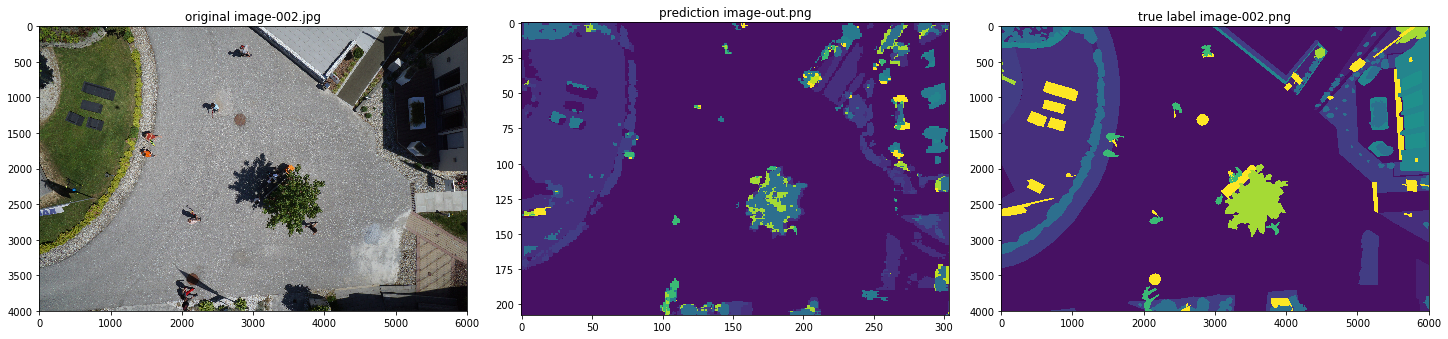

In [27]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

start = time.time()

input_image = "/kaggle/input/semantic-drone-dataset/semantic_drone_dataset/original_images/002.jpg"
out = model.predict_segmentation(
    inp=input_image,
    out_fname="out.png"
)

fig, axs = plt.subplots(1, 3, figsize=(20, 20), constrained_layout=True)

img_orig = Image.open(input_image)
axs[0].imshow(img_orig)
axs[0].set_title('original image-002.jpg')
axs[0].grid(False)

axs[1].imshow(out)
axs[1].set_title('prediction image-out.png')
axs[1].grid(False)

validation_image = "/kaggle/input/semantic-drone-dataset/semantic_drone_dataset/label_images_semantic/002.png"
axs[2].imshow( Image.open(validation_image))
axs[2].set_title('true label image-002.png')
axs[2].grid(False)


done = time.time()
elapsed = done - start

In [28]:
print(elapsed)
print(out)
print(out.shape)

3.558011770248413
[[ 0  0  0 ...  0  0  0]
 [ 0  3  8 ...  8  3  3]
 [ 0  3  8 ...  8  8  8]
 ...
 [ 0  1  1 ...  1  1  3]
 [ 0  1  1 ...  1  1 20]
 [ 0  1  1 ...  1  8  2]]
(208, 304)
